In [13]:
import xarray as xr
import pyorc
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Scanning video: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]


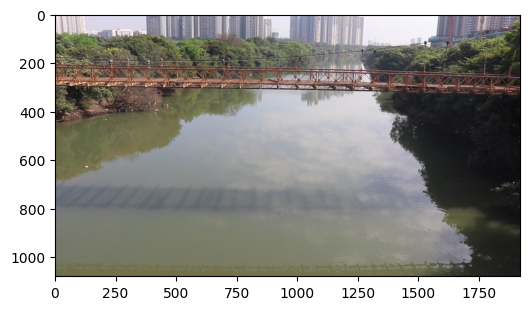

In [14]:
#%matplotlib notebook
video_file = r"../Videos/bridge_main_1.MP4"
video = pyorc.Video(video_file, start_frame=0, end_frame=1)  # we only need one frame
frame = video.get_frame(0, method="rgb")

# plot frame on a notebook-style window
f = plt.figure(figsize=(6, 6))
plt.imshow(frame)
#plt.savefig("BR_final.png")

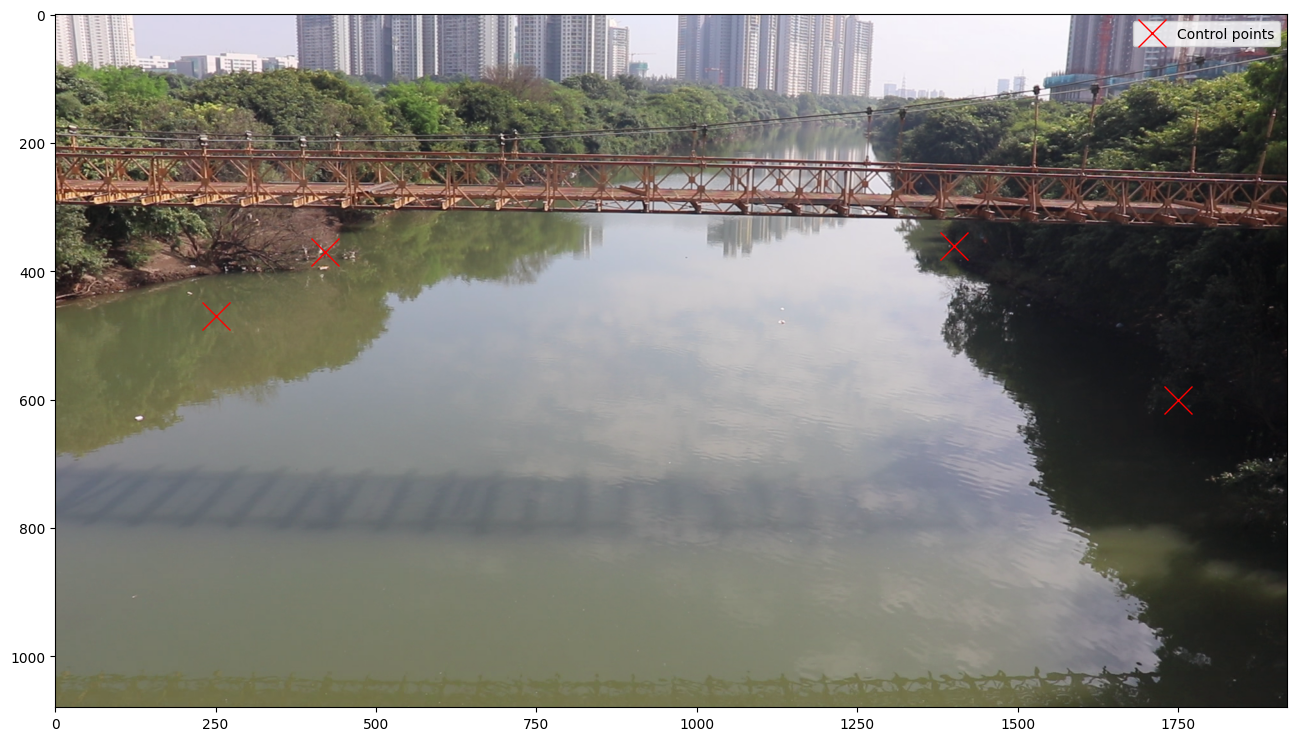

In [15]:
%matplotlib inline
gcps = dict(
    src=[
    [1750, 600],   # bottom right
    [1400 , 360],   #  top right 
    [420, 370],    # top left 
    [250 , 470]     # bottom left 
]
)

f = plt.figure(figsize=(16, 9))
plt.imshow(frame)
plt.plot(*zip(*gcps["src"]), "rx", markersize=20, label="Control points")
plt.legend()

# current cords - 18.56899 , 73.733471

In [16]:
# first add our UTM 35S coordinates. This MUST be in precisely the same order as the src coordinates.

gcps["dst"] = [
    [366400.720, 2053619.745],  # bottom right (matches src[0])
    [366418.640, 2053631.682],  # top right (matches src[1]) 
    [366362.501, 2053663.064],  # top left (matches src[2])
    [366353.367, 2053654.939]   # bottom left (matches src[3])
]

# # if we would use this video as survey in video, the lines below are also needed, 
# # and proper values need to be filled in. They are now commented out.
# gcps["h_ref"] = <your locally measured water level during survey in>
gcps["z_0"] = 0

# set the height and width
height, width = frame.shape[0:2]

# now we use everything to make a camera configuration
# Using EPSG:32643 (UTM Zone 43N) which is correct for your location (18.57°N, 73.73°E)
cam_config = pyorc.CameraConfig(height=height, width=width, gcps=gcps, crs=32643, lens_position=[366343.108, 2053606.870, 30])

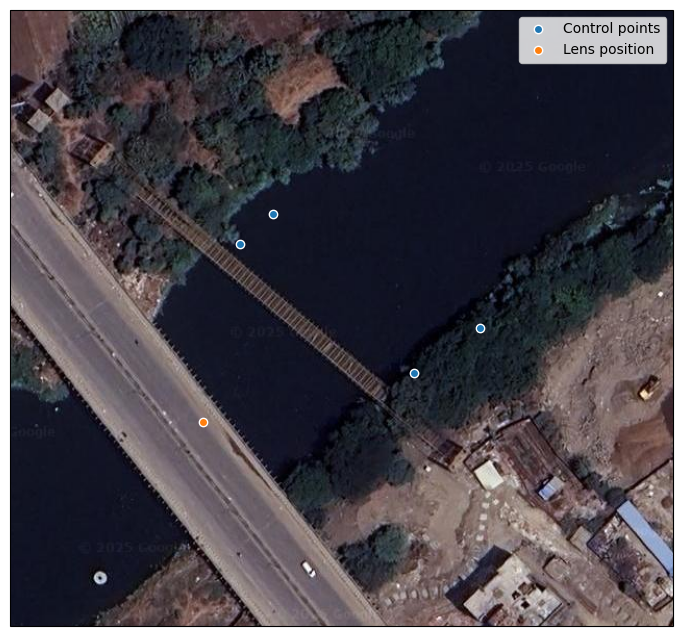

In [17]:
ax = cam_config.plot(tiles="GoogleTiles", tiles_kwargs={"style": "satellite"})

POLYGON ((366351.9689999994 2053651.296999999, 366352.1010303025 2053651.4246262624, 366352.23306060536 2053651.552252524, 366352.36509090837 2053651.6798787867, 366352.4971212115 2053651.8075050488, 366352.6291515145 2053651.9351313119, 366352.7611818175 2053652.062757575, 366352.8932121207 2053652.1903838373, 366353.0252424234 2053652.3180100992, 366353.1572727266 2053652.445636362, 366353.28930302983 2053652.5732626256, 366353.4213333327 2053652.7008888877, 366353.55336363596 2053652.8285151504, 366353.68539393874 2053652.956141413, 366353.81742424174 2053653.0837676749, 366353.9494545448 2053653.2113939377, 366354.08148484793 2053653.3390202005, 366354.21351515094 2053653.4666464636, 366354.34554545407 2053653.5942727262, 366354.4775757572 2053653.7218989898, 366354.6096060601 2053653.8495252514, 366354.7416363632 2053653.9771515145, 366354.8736666661 2053654.104777777, 366355.0056969691 2053654.2324040385, 366355.1377272723 2053654.3600303025, 366355.2697575753 2053654.487656565, 

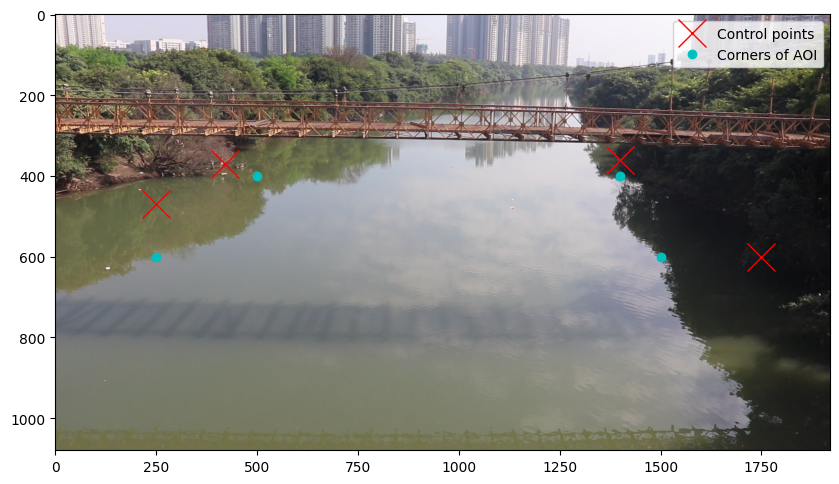

In [26]:
corners = [
    [250 ,600],   # bottom left
    [500 , 400],   #  top left 
    [1400 , 400],    # top right
    [1500 , 600]     # bottom right
]
#cam_config.set_bbox_from_corners(corners)

from shapely.geometry import Polygon

bbox_coords = [
    (366351.969, 2053651.297),
    (366365.040, 2053663.932),
    (366409.232, 2053629.534),
    (366391.942, 2053617.261),
    (366351.969, 2053651.297)
]

bbox_polygon = Polygon(bbox_coords)

cam_config.bbox = bbox_polygon 


cam_config.resolution = 38
cam_config.window_size = 25000
print(cam_config.get_bbox() )

f = plt.figure(figsize=(10, 6))
plt.imshow(frame)
plt.plot(*zip(*gcps["src"]), "rx", markersize=20, label="Control points")


plt.plot(*zip(*corners), "co", label="Corners of AOI")
plt.legend()


# https://coordinates-converter.com/en/decimal/18.568943,73.733518?karte=OpenStreetMap&zoom=19

# https://earth.google.com/web/search/maan+road+connector+bridge/@18.56939012,73.73385109,571.87842292a,190.95937197d,35y,-0h,0t,0r/data=CokBGlsSVQolMHgzYmMyYmJlOWFiOGJlN2JiOjB4ZWUxMTc4ZWViYjkxMDU1YRlKo7iZwJMyQCGBaJw8m21SQCoabWFhbiByb2FkIGNvbm5lY3RvciBicmlkZ2UYASABIiYKJAmhzozUeoM1QBGgzozUeoM1wBms65EmEedJQCGs65EmEedJwEICCAE6AwoBMEICCABKDQj___________8BEAA


In [ ]:
cam_config.bbox = bbox_polygon


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_13832\1428120117.py:3: DeprecationWarning: The camera=True option is deprecated, use mode='camera' instead. This option will be removed in a future release.
  ax1 = cam_config.plot(tiles="GoogleTiles", tiles_kwargs={"style": "satellite"} , camera=True)
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_13832\1428120117.py:8: DeprecationWarning: The camera=True option is deprecated, use mode='camera' instead. This option will be removed in a future release.
  cam_config.plot(ax=ax2, camera=True)


<Axes: xlabel='column [-]', ylabel='row [-]'>

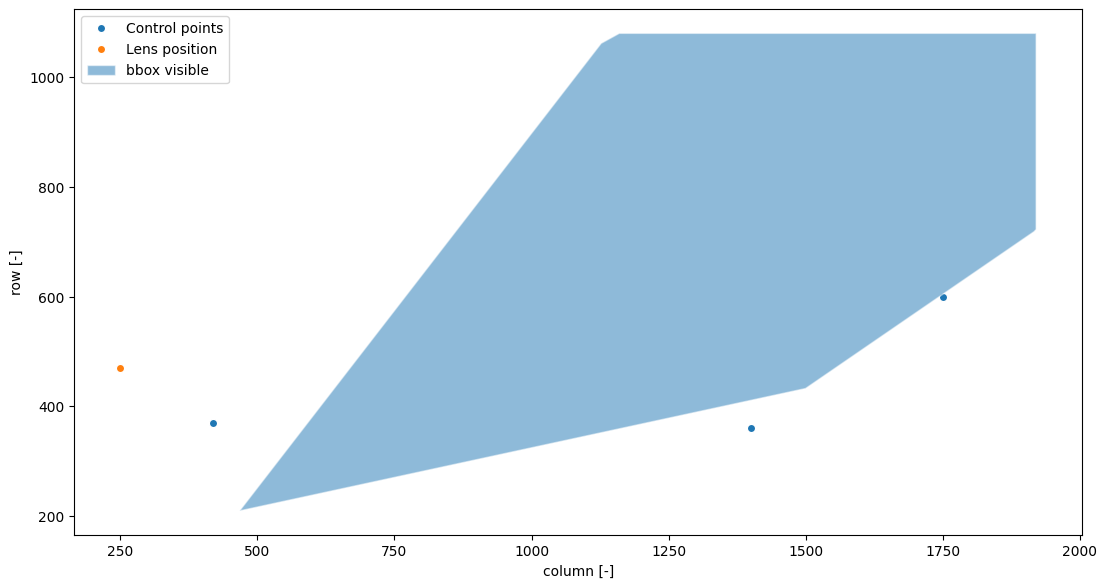

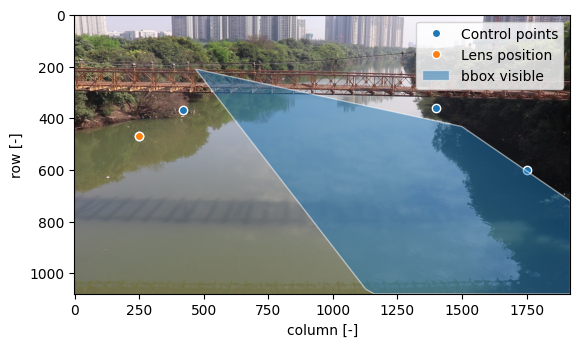

In [19]:
%matplotlib inline

ax1 = cam_config.plot(tiles="GoogleTiles", tiles_kwargs={"style": "satellite"} , camera=True)

f = plt.figure()
ax2 = plt.axes()
ax2.imshow(frame)
cam_config.plot(ax=ax2, camera=True)

#plt.savefig("BR_cam_config_plot.jpg", bbox_inches="tight", dpi=72)

In [20]:
print(cam_config)
cam_config.to_file("Outputs/BR.json")

{
    "height": 1080,
    "width": 1920,
    "crs": "PROJCRS[\"WGS 84 / UTM zone 43N\",BASEGEOGCRS[\"WGS 84\",ENSEMBLE[\"World Geodetic System 1984 ensemble\",MEMBER[\"World Geodetic System 1984 (Transit)\"],MEMBER[\"World Geodetic System 1984 (G730)\"],MEMBER[\"World Geodetic System 1984 (G873)\"],MEMBER[\"World Geodetic System 1984 (G1150)\"],MEMBER[\"World Geodetic System 1984 (G1674)\"],MEMBER[\"World Geodetic System 1984 (G1762)\"],MEMBER[\"World Geodetic System 1984 (G2139)\"],MEMBER[\"World Geodetic System 1984 (G2296)\"],ELLIPSOID[\"WGS 84\",6378137,298.257223563,LENGTHUNIT[\"metre\",1]],ENSEMBLEACCURACY[2.0]],PRIMEM[\"Greenwich\",0,ANGLEUNIT[\"degree\",0.0174532925199433]],ID[\"EPSG\",4326]],CONVERSION[\"UTM zone 43N\",METHOD[\"Transverse Mercator\",ID[\"EPSG\",9807]],PARAMETER[\"Latitude of natural origin\",0,ANGLEUNIT[\"degree\",0.0174532925199433],ID[\"EPSG\",8801]],PARAMETER[\"Longitude of natural origin\",75,ANGLEUNIT[\"degree\",0.0174532925199433],ID[\"EPSG\",8802]],PARA

In [28]:
display(gcps)
display(cam_config)

{'src': [[1750, 600], [1400, 360], [420, 370], [250, 470]],
 'dst': [[366400.72, 2053619.745],
  [366418.64, 2053631.682],
  [366362.501, 2053663.064],
  [366353.367, 2053654.939]],
 'z_0': 0}

{
    "height": 1080,
    "width": 1920,
    "crs": "PROJCRS[\"WGS 84 / UTM zone 43N\",BASEGEOGCRS[\"WGS 84\",ENSEMBLE[\"World Geodetic System 1984 ensemble\",MEMBER[\"World Geodetic System 1984 (Transit)\"],MEMBER[\"World Geodetic System 1984 (G730)\"],MEMBER[\"World Geodetic System 1984 (G873)\"],MEMBER[\"World Geodetic System 1984 (G1150)\"],MEMBER[\"World Geodetic System 1984 (G1674)\"],MEMBER[\"World Geodetic System 1984 (G1762)\"],MEMBER[\"World Geodetic System 1984 (G2139)\"],MEMBER[\"World Geodetic System 1984 (G2296)\"],ELLIPSOID[\"WGS 84\",6378137,298.257223563,LENGTHUNIT[\"metre\",1]],ENSEMBLEACCURACY[2.0]],PRIMEM[\"Greenwich\",0,ANGLEUNIT[\"degree\",0.0174532925199433]],ID[\"EPSG\",4326]],CONVERSION[\"UTM zone 43N\",METHOD[\"Transverse Mercator\",ID[\"EPSG\",9807]],PARAMETER[\"Latitude of natural origin\",0,ANGLEUNIT[\"degree\",0.0174532925199433],ID[\"EPSG\",8801]],PARAMETER[\"Longitude of natural origin\",75,ANGLEUNIT[\"degree\",0.0174532925199433],ID[\"EPSG\",8802]],PARA

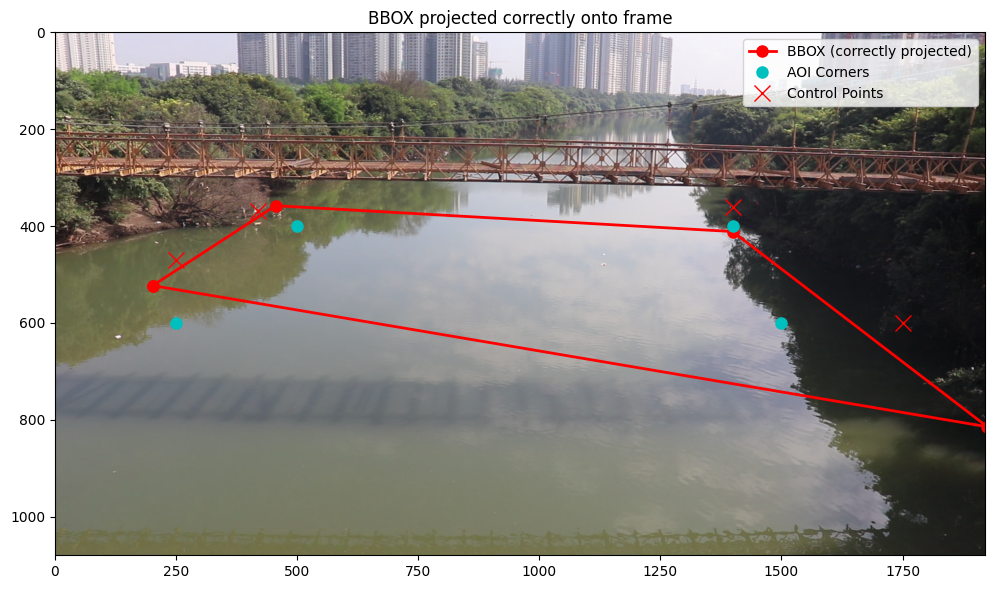

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# === 1. Extract GCP arrays ===
src = np.array(gcps["src"], dtype=np.float32)      # pixel coordinates
dst = np.array(gcps["dst"], dtype=np.float32)      # world (UTM) coordinates

# === 2. Compute world → pixel homography ===
H, _ = cv2.findHomography(dst, src)

# === 3. Convert bbox world → pixel ===
bbox_w = np.array(bbox_coords, dtype=np.float32)
bbox_w_h = np.hstack([bbox_w, np.ones((bbox_w.shape[0], 1), dtype=np.float32)])   # make homogeneous

bbox_p_h = (H @ bbox_w_h.T).T
bbox_p = bbox_p_h[:, :2] / bbox_p_h[:, 2][:, None]   # dehomogenize

px = bbox_p[:, 0]
py = bbox_p[:, 1]

# === 4. Plot everything ===
plt.figure(figsize=(12, 7))
plt.imshow(frame)

# BBOX (correctly placed)
plt.plot(px, py, "ro-", linewidth=2, markersize=8, label="BBOX (correctly projected)")

# AOI corners (pixel)
plt.plot(*zip(*corners), "co", markersize=8, label="AOI Corners")

# GCPs (pixel)
plt.plot(*zip(*gcps["src"]), "rx", markersize=12, label="Control Points")

plt.xlim(0, frame.shape[1])
plt.ylim(frame.shape[0], 0)
plt.legend()
plt.title("BBOX projected correctly onto frame")
plt.show()
